In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [48]:
eicu1 = pd.read_csv('data/eicu1_apache.csv')
eicu2 = pd.read_csv('data/eicu2_apache.csv')

In [49]:
eicu1.head()

,patientunitstayid,ethnicity,apacheversion,predictedicumortality,actualicumortality,predictedhospitalmortality,actualhospitalmortality,predictedhospitallos,actualhospitallos
0,220440,Caucasian,IV,0.000781,ALIVE,0.001867,ALIVE,3.927956,0.9146
1,220440,Caucasian,IVa,0.001312,ALIVE,0.002507,ALIVE,4.496788,0.9146
2,2362630,Caucasian,IV,0.000691,ALIVE,0.001431,ALIVE,0.170000,0.5486
3,2362630,Caucasian,IVa,0.000996,ALIVE,0.001654,ALIVE,0.147062,0.5486
4,2090064,Caucasian,IVa,0.007695,ALIVE,0.015440,ALIVE,5.902495,3.7924


In [50]:
eicu2.head()

,patientunitstayid,ethnicity,apacheversion,predictedicumortality,actualicumortality,predictedhospitalmortality,actualhospitalmortality,predictedhospitallos,actualhospitallos
0,6816064,Caucasian,IVa,0.001408,ALIVE,0.003738,ALIVE,4.30147,2.0
1,7120292,Caucasian,IVa,0.010394,ALIVE,0.026132,ALIVE,5.77791,2.0
2,6484706,Caucasian,IVb,0.012714,ALIVE,0.031207,ALIVE,4.79396,2.0
3,6184969,Other/Unknown,IVb,0.013961,ALIVE,0.017706,ALIVE,4.09150,2.0
4,6184969,Other/Unknown,IV,0.014988,ALIVE,0.029678,ALIVE,5.59473,2.0


In [30]:
eicu1_iv = eicu1.loc[eicu1.apacheversion == 'IV']
eicu2_iv = eicu2.loc[eicu2.apacheversion == 'IV']

In [31]:
eicu1_iv.actualicumortality.value_counts()

actualicumortality
ALIVE      139917
EXPIRED      8615
Name: count, dtype: int64

In [32]:
eicu2_iv.actualicumortality.value_counts()

actualicumortality
ALIVE      96858
EXPIRED     9502
Name: count, dtype: int64

In [33]:
eicu1_iv.predictedicumortality.describe()

count    148532.000000
mean          0.048877
std           0.235401
min          -1.000000
25%           0.008532
50%           0.023831
75%           0.071367
max           0.987051
Name: predictedicumortality, dtype: float64

In [34]:
eicu2_iv.predictedicumortality.describe()

count    106360.000000
mean          0.042433
std           0.268682
min          -1.000000
25%           0.009114
50%           0.026069
75%           0.079855
max           0.994095
Name: predictedicumortality, dtype: float64

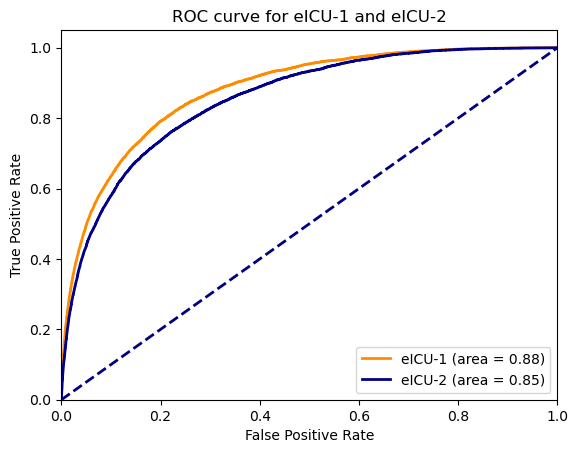

In [35]:

version = "IV"

# limit to version
eicu1_iv = eicu1.loc[eicu1.apacheversion == version]
eicu2_iv = eicu2.loc[eicu2.apacheversion == version]

# limit to patients with apache score > 0
eicu1_iv = eicu1_iv.loc[eicu1_iv.predictedicumortality > 0]
eicu2_iv = eicu2_iv.loc[eicu2_iv.predictedicumortality > 0]

# convert actual icu mortality to binary
eicu1_iv['actualicumortality_binary'] = eicu1_iv.actualicumortality == 'EXPIRED'
eicu2_iv['actualicumortality_binary'] = eicu2_iv.actualicumortality == 'EXPIRED'

fpr1, tpr1, _ = roc_curve(eicu1_iv.actualicumortality_binary, eicu1_iv.predictedicumortality)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, _ = roc_curve(eicu2_iv.actualicumortality_binary, eicu2_iv.predictedicumortality)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw, label='eICU-1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='darkblue',
            lw=lw, label='eICU-2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for eICU-1 and eICU-2')
plt.legend(loc="lower right")
plt.show()


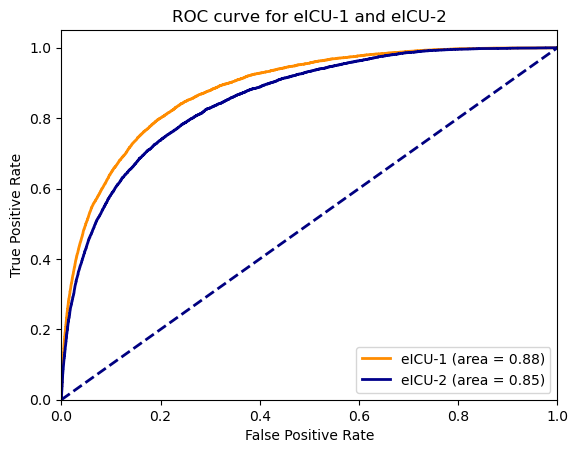

In [36]:
version = "IVa"

# limit to version
eicu1_iv = eicu1.loc[eicu1.apacheversion == version]
eicu2_iv = eicu2.loc[eicu2.apacheversion == version]

# limit to patients with apache score > 0
eicu1_iv = eicu1_iv.loc[eicu1_iv.predictedicumortality > 0]
eicu2_iv = eicu2_iv.loc[eicu2_iv.predictedicumortality > 0]

# convert actual icu mortality to binary
eicu1_iv['actualicumortality_binary'] = eicu1_iv.actualicumortality == 'EXPIRED'
eicu2_iv['actualicumortality_binary'] = eicu2_iv.actualicumortality == 'EXPIRED'

fpr1, tpr1, _ = roc_curve(eicu1_iv.actualicumortality_binary, eicu1_iv.predictedicumortality)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, _ = roc_curve(eicu2_iv.actualicumortality_binary, eicu2_iv.predictedicumortality)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw, label='eICU-1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='darkblue',
            lw=lw, label='eICU-2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for eICU-1 and eICU-2')
plt.legend(loc="lower right")
plt.show()


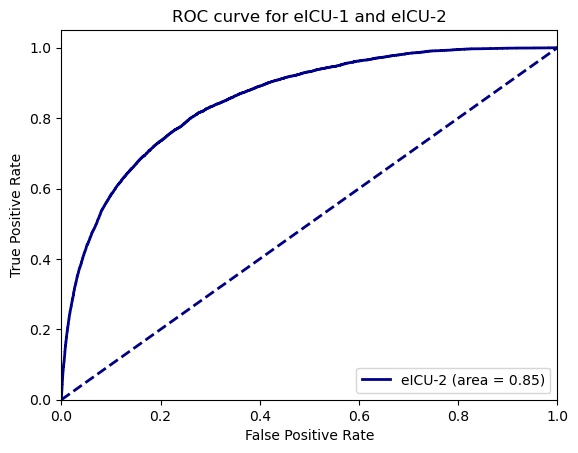

In [37]:
version = "IVb"

# limit to version
eicu2_iv = eicu2.loc[eicu2.apacheversion == version]

# limit to patients with apache score > 0
eicu2_iv = eicu2_iv.loc[eicu2_iv.predictedicumortality > 0]

# convert actual icu mortality to binary
eicu2_iv['actualicumortality_binary'] = eicu2_iv.actualicumortality == 'EXPIRED'

fpr2, tpr2, _ = roc_curve(eicu2_iv.actualicumortality_binary, eicu2_iv.predictedicumortality)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkblue',
            lw=lw, label='eICU-2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for eICU-1 and eICU-2')
plt.legend(loc="lower right")
plt.show()


In [40]:
eicu1_iv['ethnicity'].unique()

array(['Caucasian', 'African American', 'Other/Unknown', nan, 'Hispanic',
       'Asian', 'Native American'], dtype=object)

ethnicity
Caucasian           110800
African American     16430
Other/Unknown         6471
Hispanic              5626
Asian                 2039
Native American       1015
Name: count, dtype: int64
Caucasian
African American
Other/Unknown
Hispanic
Asian
Native American


/var/folders/g2/8l2qx8ps32qdjs9vp5ps103m0000gn/T/ipykernel_55836/2527953973.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eicu1_class['actualicumortality_binary'] = eicu1_class['actualicumortality'] == 'EXPIRED'
/var/folders/g2/8l2qx8ps32qdjs9vp5ps103m0000gn/T/ipykernel_55836/2527953973.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eicu1_class['actualicumortality_binary'] = eicu1_class['actualicumortality'] == 'EXPIRED'
/var/folders/g2/8l2qx8ps32qdjs9vp5ps103m0000gn/T/ipykernel_55836/252795397

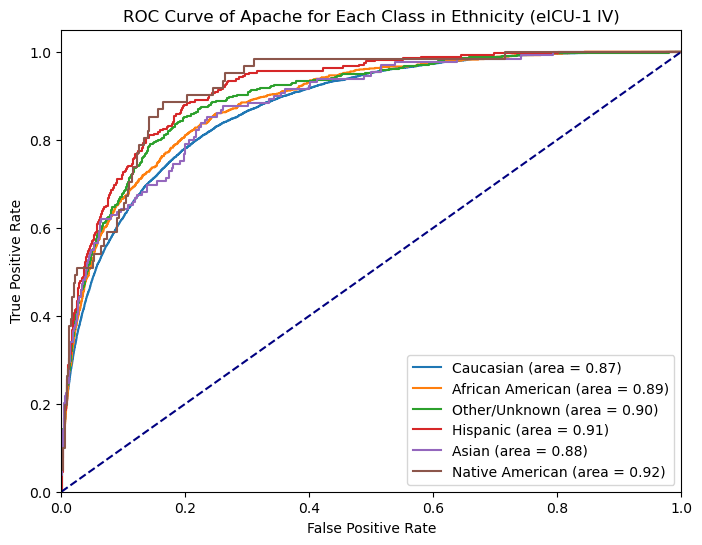

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Filter the dataframe for version IV
eicu1_iv = eicu1[eicu1['apacheversion'] == 'IV']
eicu1_iv = eicu1_iv[eicu1_iv['predictedicumortality'] >= 0]
# remove 'nan' ethnicity
eicu1_iv = eicu1_iv[eicu1_iv['ethnicity'] != 'nan']
eicu1_iv = eicu1_iv[eicu1_iv['ethnicity'].notnull()]
print(eicu1_iv.ethnicity.value_counts())
# Get the unique classes in the ethnicity column
ethnicity_classes = eicu1_iv['ethnicity'].unique()

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for ethnicity_class in ethnicity_classes:
    # Filter the dataframe for the current class
    eicu1_class = eicu1_iv[eicu1_iv['ethnicity'] == ethnicity_class]

    # Convert actual icu mortality to binary
    eicu1_class['actualicumortality_binary'] = eicu1_class['actualicumortality'] == 'EXPIRED'
    print(ethnicity_class)
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(eicu1_class['actualicumortality_binary'], eicu1_class['predictedicumortality'])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{ethnicity_class} (area = {roc_auc:.2f})')

# Set plot properties
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Apache for Each Class in Ethnicity (eICU-1 IV)')
plt.legend(loc='lower right')
plt.show()

ethnicity
Caucasian                 74935
African American           7999
Other/Unknown              7555
Black/African American     4303
Hispanic                   3810
Asian                      1447
Native American             336
Indigenous/Native           185
Name: count, dtype: int64
Other/Unknown
Caucasian
African American
Hispanic
Black/African American
Native American
Asian
Indigenous/Native


/var/folders/g2/8l2qx8ps32qdjs9vp5ps103m0000gn/T/ipykernel_55836/842567164.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eicu1_class['actualicumortality_binary'] = eicu1_class['actualicumortality'] == 'EXPIRED'
/var/folders/g2/8l2qx8ps32qdjs9vp5ps103m0000gn/T/ipykernel_55836/842567164.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eicu1_class['actualicumortality_binary'] = eicu1_class['actualicumortality'] == 'EXPIRED'
/var/folders/g2/8l2qx8ps32qdjs9vp5ps103m0000gn/T/ipykernel_55836/842567164.p

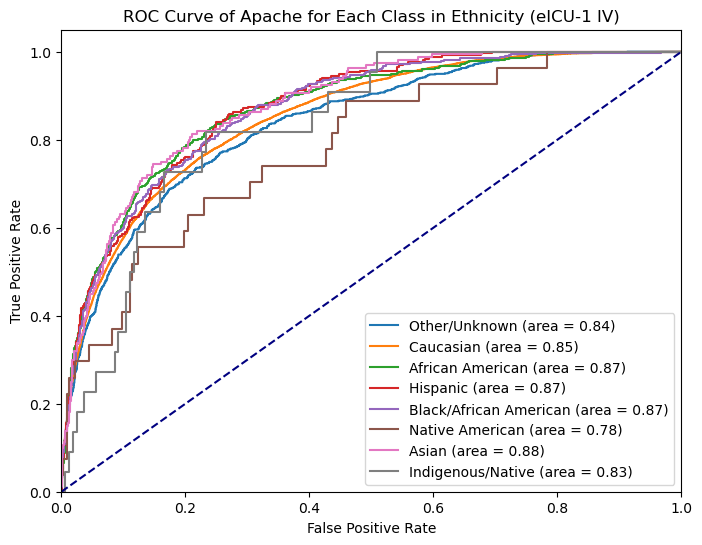

In [51]:

# Filter the dataframe for version IV
eicu1_iv = eicu2[eicu2['apacheversion'] == 'IV']
eicu1_iv = eicu1_iv[eicu1_iv['predictedicumortality'] >= 0]
# remove 'nan' ethnicity
eicu1_iv = eicu1_iv[eicu1_iv['ethnicity'] != 'nan']
eicu1_iv = eicu1_iv[eicu1_iv['ethnicity'].notnull()]
print(eicu1_iv.ethnicity.value_counts())
# Get the unique classes in the ethnicity column
ethnicity_classes = eicu1_iv['ethnicity'].unique()

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for ethnicity_class in ethnicity_classes:
    # Filter the dataframe for the current class
    eicu1_class = eicu1_iv[eicu1_iv['ethnicity'] == ethnicity_class]

    # Convert actual icu mortality to binary
    eicu1_class['actualicumortality_binary'] = eicu1_class['actualicumortality'] == 'EXPIRED'
    print(ethnicity_class)
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(eicu1_class['actualicumortality_binary'], eicu1_class['predictedicumortality'])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{ethnicity_class} (area = {roc_auc:.2f})')

# Set plot properties
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Apache for Each Class in Ethnicity (eICU-1 IV)')
plt.legend(loc='lower right')
plt.show()